The code is from https://blog.csdn.net/sinat_29957455

In [1]:
import tensorflow as tf
import numpy as np
#from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
#from tensorflow.examples.tutorials.mnist import input_data
import input_data
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
'''
编码器解码器参数设置
'''
class Config(object):
    #设置学习率
    learning_rate = 0.001
    #训练轮数
    training_epochs = 20
    #设置batch size
    batch_size = 256
    #设置每多少轮输出一次训练结果
    print_epoch = 1
    #从测试集选择多少张图片验证结果
    test_to_show = 10
    #设置第一层隐藏层神经元的个数
    n_hidden1 = 256
    #设置第二层隐藏层神经元的个数
    n_hidden2 = 128
    #设置输入神经元的个数
    n_input = 784

In [3]:
'''
设置编码器和解码器的结构
'''
class Encoder_Decoder(object):
    def __init__(self,config):
        self.config = config
        #定义输入
        self.input_x = tf.placeholder("float",[None,config.n_input])
        self.weights = {
            #设置第一层编码器权重
            "encoder_w1":tf.Variable(tf.random_normal([self.config.n_input,self.config.n_hidden1])),
            #设置第二层编码器权重
            "encoder_w2":tf.Variable(tf.random_normal([self.config.n_hidden1,self.config.n_hidden2])),
            #设置第一层解码器权重
            "decoder_w1":tf.Variable(tf.random_normal([self.config.n_hidden2,self.config.n_hidden1])),
            #设置第二层解码器权重
            "decoder_w2":tf.Variable(tf.random_normal([self.config.n_hidden1,self.config.n_input]))
        }
        self.biases = {
            #设置第一层编码器偏置
            "encoder_b1":tf.Variable(tf.random_normal([self.config.n_hidden1])),
            #设置第二层编码器偏置
            "encoder_b2":tf.Variable(tf.random_normal([self.config.n_hidden2])),
            #设置第一层解码器偏置
            "decoder_b1":tf.Variable(tf.random_normal([self.config.n_hidden1])),
            #设置第二层解码器偏置
            "decoder_b2":tf.Variable(tf.random_normal([self.config.n_input]))
        }
        #编码
        self.encoder()
        #解码
        self.decoder()
        #定义平方差损失函数
        self.loss = tf.reduce_mean(tf.pow(self.input_x - self.decoder_layer2,2))
        #最小化损失函数
        self.Adam = tf.train.AdamOptimizer(config.learning_rate).minimize(self.loss)
    #编码器模型
    def encoder(self):
        #第一层编码器
        self.encoder_layer1 = tf.nn.sigmoid(
            tf.matmul(self.input_x,self.weights["encoder_w1"])+self.biases["encoder_b1"])
        #第二层编码器
        self.encoder_layer2 = tf.nn.sigmoid(
            tf.matmul(self.encoder_layer1,self.weights["encoder_w2"])+self.biases["encoder_b2"])
 
    #解码器模型
    def decoder(self):
        #第一层解码器
        self.decoder_layer1 = tf.nn.sigmoid(tf.matmul(
            self.encoder_layer2,self.weights["decoder_w1"])+self.biases["decoder_b1"])
        #第二层解码器
        self.decoder_layer2 = tf.nn.sigmoid(tf.matmul(
            self.decoder_layer1,self.weights["decoder_w2"])+self.biases["decoder_b2"])

In [4]:
def training():
    #获取数据集
    mnist_data = input_data.read_data_sets("MNIST_data")
    #初始化网络设置参数
    config = Config()
    #初始化网络
    encode_decode = Encoder_Decoder(config)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #计算总的迭代次数
        total_batch = (mnist_data.train.num_examples-1) // config.batch_size + 1
        for epoch in range(config.training_epochs):
            for i in range(total_batch):
                batch_xs,batch_ys = mnist_data.train.next_batch(config.batch_size)
                _,loss = sess.run([encode_decode.Adam,encode_decode.loss],
                                  feed_dict={encode_decode.input_x:batch_xs})
            if epoch % config.print_epoch == 0:
                print("epoch:%d,loss:%.3f"%(epoch+1,loss))
        #对测试集的进行编码
        test_encode_decode = sess.run(encode_decode.decoder_layer2,
                        feed_dict={encode_decode.input_x:mnist_data.test.images[:config.test_to_show]})
        #比较测试集和编码解码后的结果
        f,a = plt.subplots(2,10,figsize=(10,2))
        for i in range(config.test_to_show):
            #测试集的原始图片
            a[0][i].imshow(np.reshape(mnist_data.test.images[i],(28,28)))
            #编码解码后的图片
            a[1][i].imshow(np.reshape(test_encode_decode[i],(28,28)))
        f.show()
        plt.draw()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
epoch:1,loss:0.122
epoch:2,loss:0.116
epoch:3,loss:0.110
epoch:4,loss:0.104
epoch:5,loss:0.099
epoch:6,loss:0.095
epoch:7,loss:0.088
epoch:8,loss:0.084
epoch:9,loss:0.084
epoch:10,loss:0.080
epoch:11,loss:0.079
epoch:12,loss:0.079
epoch:13,loss:0.076
epoch:14,loss:0.076
epoch:15,loss:0.075
epoch:16,loss:0.075
epoch:17,loss:0.075
epoch:18,loss:0.071
epoch:19,loss:0.069
epoch:20,loss:0.066


/home/xhliu/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


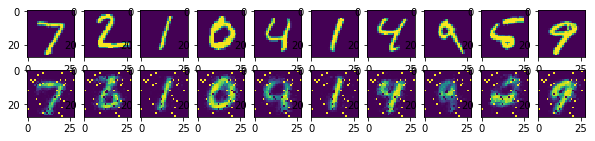

In [5]:
training()